In [1]:
from matplotlib import pyplot as plt

from util import load_genetic_model, load_gd_model
from model_viz import graph_from_model, draw_model_graph

normalized = True

In [2]:
# set output format to svg
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

# Genetic Approach

In [3]:
from wann_genetic.tools import ExperimentSeries

In [4]:
data_dir = "../wann-genetic-results/data/08_a_mnist"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
df['dist'] = df['distribution/_name']
df = df.query("task=='mnist784' and dist=='linspace -2,2'")

Mean accuracy: 56.75%


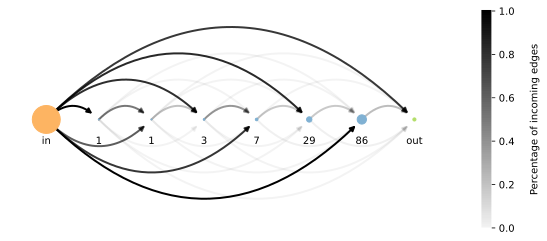

Mean accuracy: 63.62%


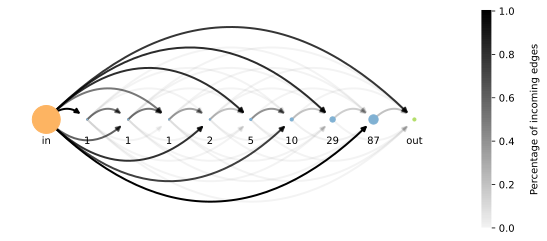

In [5]:
for index, row in df.iterrows():
    mean_accuracy = float(row['MAX:accuracy.mean'])
    print(f"Mean accuracy: {mean_accuracy:.2%}")
    c = row['_configuration']
    i, _ = row['ARGMAX:accuracy.mean']
    
    env = series.configuration_env(c)
    with env.open_data():
        env.load_hof()
    ind = env.hall_of_fame[i]
    
    model = load_genetic_model(ind)
    
    model.cleanup()
    g = graph_from_model(model, normalized=normalized)
    draw_model_graph(g, normalized=normalized)
    plt.gcf().set_size_inches(10,4)
    plt.show()
    

# Gradient Descent Based Approach

In [6]:
from wann_gd.util import load_series_data
import os.path

In [7]:
data_dir = "../wann-gradient-based/data/02_mnist_longer_experiments"
df = load_series_data(data_dir)
df = df.query('lr==1 and epochs==400 and mnist_size==784')

## Trained using Static Networks

Mean accuracy 93.59%


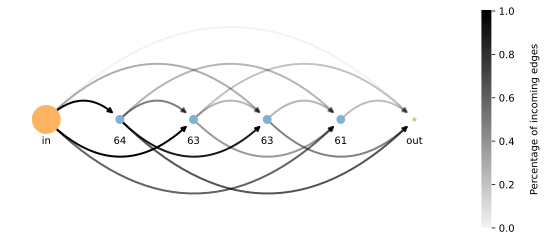

Mean accuracy 91.38%


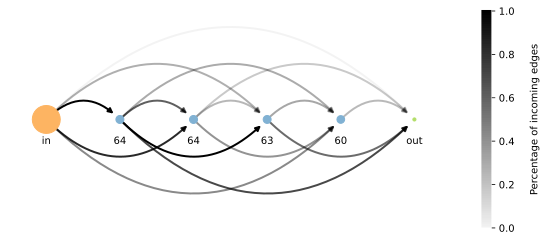

Mean accuracy 75.80%


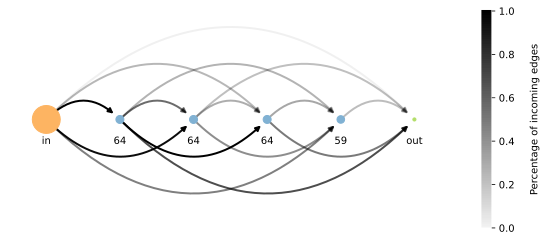

Mean accuracy 92.75%


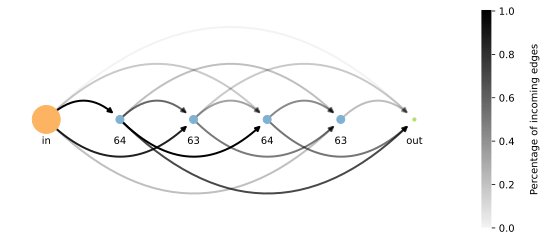

In [8]:
for i, row in df.query('growing==False').iterrows():
    print(f"Mean accuracy {row['accuracy']:.2%}")
    path = os.path.join(data_dir, row['run_name'], 'model.pt')
    model = load_gd_model(path)
    
    model.cleanup()
    g = graph_from_model(model, normalized=normalized)
    draw_model_graph(g, normalized=normalized)
    plt.gcf().set_size_inches(10,4)
    plt.show()

## Trained with Network Expansion

Mean accuracy 86.35%


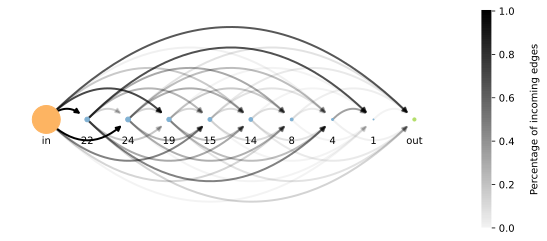

Mean accuracy 80.28%


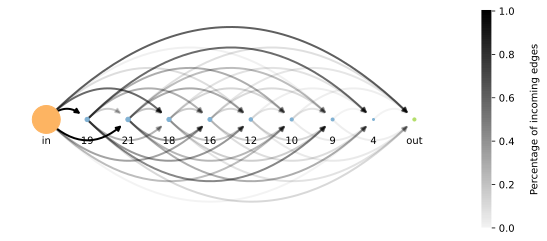

Mean accuracy 47.30%


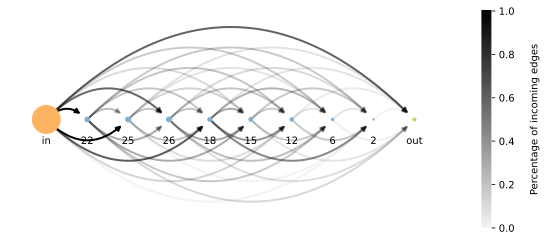

Mean accuracy 65.09%


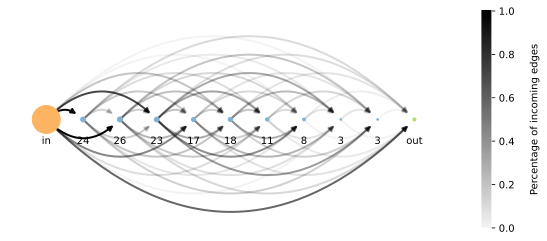

In [9]:
for i, row in df.query('growing==True').iterrows():
    print(f"Mean accuracy {row['accuracy']:.2%}")
    path = os.path.join(data_dir, row['run_name'], 'model.pt')
    model = load_gd_model(path)
    
    model.cleanup()
    g = graph_from_model(model, normalized=normalized)
    draw_model_graph(g, normalized=normalized)
    plt.gcf().set_size_inches(10,4)
    plt.show()